In [1]:
import pandas as pd
train= pd.read_csv('korean-hate-speech/labeled/train.tsv' ,sep='\t')
dev= pd.read_csv('korean-hate-speech/labeled/dev.tsv' ,sep='\t')

In [2]:
train

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate
...,...,...,...,...
7891,힘내세요~ 응원합니다!!,False,none,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,False,none,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,False,none,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,False,none,none


# 독립변수 처리

In [3]:
train = train[['comments','hate']]
train['hate'] = train['hate'].map({'none':0,'offensive':1,'hate':2})
dev = dev[['comments','hate']]
dev['hate'] = dev['hate'].map({'none':0,'offensive':1,'hate':2})

<ipython-input-3-4a9ecf198709>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['hate'] = train['hate'].map({'none':0,'offensive':1,'hate':2})


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
print('훈련용 리뷰의 개수 :', len(train))
print('테스트용 리뷰의 개수 :', len(dev))

훈련용 리뷰의 개수 : 7896
테스트용 리뷰의 개수 : 471


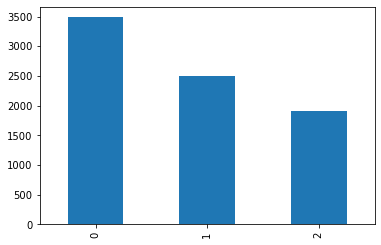

In [6]:
train['hate'].value_counts().plot(kind = 'bar')

# 불용어 제거 후 토큰화 작업

- ( , ) 도 추가
- ....은 의미 있을 수도 있어 제거 X

In [7]:
stopwords = ['(',')','도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '음', '면']

In [8]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

train['tokenized'] = train['comments'].apply(mecab.morphs)
train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
dev['tokenized'] = dev['comments'].apply(mecab.morphs)
dev['tokenized'] = dev['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-8-2317ec7bde5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tokenized'] = train['comments'].apply(mecab.morphs)
<ipython-input-8-2317ec7bde5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [9]:
all_token = train['tokenized'].sum()

In [10]:
import nltk
text = nltk.Text(all_token, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            
seq_len = len(set(text.tokens))
# 출현 빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(200))

123281
13784
[('.', 6170), ('?', 1998), ('거', 1182), ('..', 999), ('나', 940), ('있', 918), ('안', 906), ('보', 898), ('ㅋㅋ', 779), ('아', 707), ('없', 695), ('는데', 681), ('잘', 672), ('좋', 667), ('냐', 660), ('ㅋㅋㅋ', 645), ('!', 618), ('어', 606), ('같', 591), ('겠', 585), ('여자', 574), (',', 572), ('사람', 559), ('로', 532), ('아니', 532), ('왜', 520), ('니', 510), ('되', 494), ('했', 482), ('것', 473), ('으로', 468), ('해', 458), ('기', 457), ('좀', 451), ('말', 446), ('에서', 437), ('너무', 410), ('진짜', 405), ('~', 405), ('주', 381), ('야', 373), ('라', 370), ('었', 364), ('남자', 340), ('뭐', 331), ('못', 329), ('할', 329), ('살', 325), ('애', 313), ('더', 305), ('많', 297), ('세요', 291), ('않', 287), ('서', 286), ('때', 286), ('시', 285), ('네요', 279), ('으면', 277), ('적', 267), ('일', 265), ('씨', 262), ('알', 258), ('건', 256), ('그', 255), ('았', 251), ('연기', 250), ('수', 248), ('인데', 246), ('나오', 246), ('자', 245), ('지만', 241), ('그냥', 241), ('라고', 240), ('결혼', 240), ('내', 236), ('돈', 228), ('까지', 228), ('기사', 227), ('싶', 223), ('랑', 219)

In [11]:
train_data, test_data = train_test_split(train, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 5922
테스트용 리뷰의 개수 : 1974


In [12]:
train_data.hate.value_counts()

0    2635
1    1859
2    1428
Name: hate, dtype: int64

In [13]:
test_data.hate.value_counts()

0    851
1    640
2    483
Name: hate, dtype: int64

In [14]:
from tensorflow.keras.utils import to_categorical
dataset_y = to_categorical(train_data['hate'])
dataset_y = np.array(dataset_y, dtype=np.int32)
print(dataset_y)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [15]:
test_y = to_categorical(test_data['hate'])
test_y = np.array(test_y, dtype=np.int32)
print(test_y)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [67]:
X_train = train_data['tokenized'].values
y_train = dataset_y
X_test= test_data['tokenized'].values
y_test = test_y

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5922,), (5922, 3), (1974,), (1974, 3))

In [68]:
word_to_count(X_train[0])

[105, 29, 7, 248, 918, 82]

In [69]:
train_data['tokenized']

5781                                [이렇게, 재, 밋, 수, 있, 다니]
439     [갠, 적, 으로, 이런, 스타일, 싸, 보인다, ., ...., 스카이, 캐슬, ...
1379                                  [나, 보, 기, 불편, 함, ?]
847     [그래도, 너, 죄책감, 부끄러워, 할, 줄, 아, 는구나, ., 송혜교, 측, 아...
6794    [좋, 일, 셨, 는데, 왜, 이리, 찜찜, 할까, 나, 작정, 이미지, 세탁, 느...
                              ...                        
5226    [왜, 윤지, 성, 뜨, 거, 야, 나, 진짜, 맨날, 투표, 했, 는데, ㅠㅠ, ...
5390    [원작, 이랑, 스토리, 너무, 똑같, 시, 놉, 가져오, 에피소드, 좀, 바꿔도,...
860     [그래도, 잘, 생겼으니, 조금, 쉬, 나오, 이해, 해, 주, 것, ., ., 한...
7603    [한지민, 씨, 코디, 제발, 좀, 바꾸, 세요, ., 엄마, 찾, 으러, 다니, ...
7270    [크러시, 정용화, ,, 임시완, 급, 아닌데, 부산, 에서, 누가, 알아본다고, ㅋㅋ]
Name: tokenized, Length: 5922, dtype: object

In [70]:
selected_words = [f[0] for f in text.vocab().most_common(seq_len)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(token) for token in train_data['tokenized']]
# test_x = [term_frequency(token) for token in x_valid['token']]

In [71]:
x_train = np.array(train_x)

In [72]:
len(train_x[0])

13784

In [73]:
len(train_x)

5922

In [74]:
x_train.shape

(5922, 13784)

# 모델 구축

In [75]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, LSTM,Bidirectional ,Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = models.Sequential()
model.add(Dropout(0.5))
model.add(layers.Dense(256, activation='relu', input_shape=(13784,))) 
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu', input_shape=(13784,))) 
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu')) #ReLU 활성화함수 채택
model.add(layers.Dense(3, activation='softmax'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

# loaded_model = load_model('best_model.h5')
# print("테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/100


ValueError: in user code:

    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:386 call
        outputs = layer(inputs, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:216 call
        output = tf_utils.smart_cond(training,
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\utils\tf_utils.py:64 smart_cond
        return smart_module.smart_cond(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:210 dropped_inputs
        return nn.dropout(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:507 new_func
        return func(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:4941 dropout
        return dropout_v2(x, rate, noise_shape=noise_shape, seed=seed, name=name)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:5026 dropout_v2
        raise ValueError("x has to be a floating point tensor since it's going "

    ValueError: x has to be a floating point tensor since it's going to be scaled. Got a <dtype: 'int32'> tensor instead.


In [37]:
from tensorflow.keras.layers import Dense, LSTM,Bidirectional ,Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential([
    Embedding(vocab_size, 200, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.25),
    Dense(32,activation='relu'),
    Dense(3,activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 61, 200)           1127200   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 61, 256)           336896    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,866,659
Trainable params: 1,866,659
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(x_train, y_train, epochs=20, batch_size=64, callbacks=[es,mc],validation_split=0.2) #512개에 한 번씩 업데이터 실행


Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 0.9232 - acc: 0.5402
Epoch 00001: val_acc improved from -inf to 0.55781, saving model to best_model.h5
75/75 [==============================] - 28s 372ms/step - loss: 0.9232 - acc: 0.5402 - val_loss: 0.9225 - val_acc: 0.5578
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 0.7003 - acc: 0.6840
Epoch 00002: val_acc improved from 0.55781 to 0.57131, saving model to best_model.h5
75/75 [==============================] - 31s 411ms/step - loss: 0.7003 - acc: 0.6840 - val_loss: 1.0277 - val_acc: 0.5713
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 0.5238 - acc: 0.7775
Epoch 00003: val_acc did not improve from 0.57131
75/75 [==============================] - 29s 392ms/step - loss: 0.5238 - acc: 0.7775 - val_loss: 1.1117 - val_acc: 0.5679
Epoch 4/20
75/75 [==============================] - ETA: 0s - loss: 0.3302 - acc: 0.8712
Epoch 00004: val_acc did not improve from 0.57131
75/75 [====

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, BatchNormalization
import tensorflow as tf
# 모델 구조 정의하기
input = tf.keras.layers.Input(shape=(max_len,))
net = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64)(input)
net = tf.keras.layers.LSTM(units=64, return_sequences=True, activation='relu')(net) 
net = tf.keras.layers.LSTM(units=64, activation='relu')(net) 
net = tf.keras.layers.Dense(units=3, activation='softmax')(net)
model = tf.keras.models.Model(inputs=input, outputs=net)

model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 61)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 61, 64)            360704    
_________________________________________________________________
lstm_11 (LSTM)               (None, 61, 64)            33024     
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 426,947
Trainable params: 426,947
Non-trainable params: 0
_________________________________________________________________


In [44]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.0499 - acc: 0.4469
Epoch 00001: val_acc improved from -inf to 0.44051, saving model to best_model.h5
75/75 [==============================] - 4s 52ms/step - loss: 1.0499 - acc: 0.4469 - val_loss: 0.9972 - val_acc: 0.4405
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.8849 - acc: 0.5609- ETA: 1s - loss: 0.
Epoch 00002: val_acc improved from 0.44051 to 0.54768, saving model to best_model.h5
75/75 [==============================] - 4s 47ms/step - loss: 0.8849 - acc: 0.5609 - val_loss: 0.9304 - val_acc: 0.5477
Epoch 3/100
74/75 [============================>.] - ETA: 0s - loss: 0.8046 - acc: 0.6294
Epoch 00003: val_acc improved from 0.54768 to 0.55274, saving model to best_model.h5
75/75 [==============================] - 3s 46ms/step - loss: 0.8047 - acc: 0.6293 - val_loss: 0.9398 - val_acc: 0.5527
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.6460 - acc: 0.7178
Epoch 00

KeyboardInterrupt: 

In [54]:
# 모델 구조 정의하기
model = Sequential()
model.add(Embedding(vocab_size+1, 64, input_length=max_len))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
          
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 61, 64)            360768    
_________________________________________________________________
batch_normalization_3 (Batch (None, 61, 64)            256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 61, 64)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 61, 64)            33024     
_________________________________________________________________
batch_normalization_4 (Batch (None, 61, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 61, 64)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 64)               

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/100
74/75 [============================>.] - ETA: 0s - loss: 1.0770 - acc: 0.4326
Epoch 00001: val_acc improved from -inf to 0.43713, saving model to best_model.h5
75/75 [==============================] - 5s 64ms/step - loss: 1.0769 - acc: 0.4328 - val_loss: 1.0915 - val_acc: 0.4371
Epoch 2/100
74/75 [============================>.] - ETA: 0s - loss: 0.9251 - acc: 0.5486
Epoch 00002: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 55ms/step - loss: 0.9249 - acc: 0.5487 - val_loss: 1.0938 - val_acc: 0.3857
Epoch 3/100
74/75 [============================>.] - ETA: 0s - loss: 0.7200 - acc: 0.6710
Epoch 00003: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 59ms/step - loss: 0.7199 - acc: 0.6711 - val_loss: 1.0892 - val_acc: 0.4059
Epoch 4/100
74/75 [============================>.] - ETA: 0s - loss: 0.5512 - acc: 0.7625
Epoch 00004: val_acc improved from 0.43713 to 0.49198, saving model to best_model.h5
75/75 [======

Epoch 32/100
74/75 [============================>.] - ETA: 0s - loss: 0.0320 - acc: 0.9890
Epoch 00032: val_acc did not improve from 0.55274
75/75 [==============================] - 7s 95ms/step - loss: 0.0330 - acc: 0.9888 - val_loss: 3.9001 - val_acc: 0.5451
Epoch 33/100
74/75 [============================>.] - ETA: 0s - loss: 0.0570 - acc: 0.9831
Epoch 00033: val_acc did not improve from 0.55274
75/75 [==============================] - 9s 118ms/step - loss: 0.0569 - acc: 0.9831 - val_loss: 2.8612 - val_acc: 0.5460
Epoch 34/100
74/75 [============================>.] - ETA: 0s - loss: 0.0356 - acc: 0.9886
Epoch 00034: val_acc did not improve from 0.55274
75/75 [==============================] - 9s 118ms/step - loss: 0.0356 - acc: 0.9886 - val_loss: 3.2739 - val_acc: 0.5468
Epoch 35/100
75/75 [==============================] - ETA: 0s - loss: 0.0285 - acc: 0.9922
Epoch 00035: val_acc did not improve from 0.55274
75/75 [==============================] - 8s 109ms/step - loss: 0.0285 - ac

Epoch 63/100
75/75 [==============================] - ETA: 0s - loss: 0.0243 - acc: 0.9920
Epoch 00063: val_acc did not improve from 0.56118
75/75 [==============================] - 8s 113ms/step - loss: 0.0243 - acc: 0.9920 - val_loss: 3.5673 - val_acc: 0.5418
Epoch 64/100
74/75 [============================>.] - ETA: 0s - loss: 0.0186 - acc: 0.9941
Epoch 00064: val_acc did not improve from 0.56118
75/75 [==============================] - 9s 116ms/step - loss: 0.0185 - acc: 0.9941 - val_loss: 3.9010 - val_acc: 0.5359
Epoch 65/100
75/75 [==============================] - ETA: 0s - loss: 0.0135 - acc: 0.9951
Epoch 00065: val_acc did not improve from 0.56118
75/75 [==============================] - 10s 135ms/step - loss: 0.0135 - acc: 0.9951 - val_loss: 3.9472 - val_acc: 0.5451
Epoch 66/100
74/75 [============================>.] - ETA: 0s - loss: 0.0108 - acc: 0.9962- ETA: 3s - l
Epoch 00066: val_acc did not improve from 0.56118
75/75 [==============================] - 10s 135ms/step - l

NameError: name 'x_test' is not defined

### 1-D CNN

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [56]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.0745 - acc: 0.4433
Epoch 00001: val_acc improved from -inf to 0.43713, saving model to best_model.h5
75/75 [==============================] - 5s 61ms/step - loss: 1.0745 - acc: 0.4433 - val_loss: 1.0737 - val_acc: 0.4371
Epoch 2/100
74/75 [============================>.] - ETA: 0s - loss: 1.0708 - acc: 0.4470
Epoch 00002: val_acc did not improve from 0.43713
75/75 [==============================] - 6s 80ms/step - loss: 1.0708 - acc: 0.4469 - val_loss: 1.0788 - val_acc: 0.4371
Epoch 3/100
74/75 [============================>.] - ETA: 0s - loss: 1.0684 - acc: 0.4470
Epoch 00003: val_acc did not improve from 0.43713
75/75 [==============================] - 5s 73ms/step - loss: 1.0683 - acc: 0.4471 - val_loss: 1.0725 - val_acc: 0.4371
Epoch 4/100
74/75 [============================>.] - ETA: 0s - loss: 1.0696 - acc: 0.4468
Epoch 00004: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 56ms

Epoch 32/100
74/75 [============================>.] - ETA: 0s - loss: 1.0671 - acc: 0.4468- ETA: 1s - loss:
Epoch 00032: val_acc did not improve from 0.43713
75/75 [==============================] - 6s 74ms/step - loss: 1.0670 - acc: 0.4469 - val_loss: 1.0700 - val_acc: 0.4371
Epoch 33/100
74/75 [============================>.] - ETA: 0s - loss: 1.0670 - acc: 0.4468
Epoch 00033: val_acc did not improve from 0.43713
75/75 [==============================] - 5s 73ms/step - loss: 1.0669 - acc: 0.4469 - val_loss: 1.0702 - val_acc: 0.4371
Epoch 34/100
74/75 [============================>.] - ETA: 0s - loss: 1.0665 - acc: 0.4470
Epoch 00034: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 56ms/step - loss: 1.0665 - acc: 0.4469 - val_loss: 1.0701 - val_acc: 0.4371
Epoch 35/100
74/75 [============================>.] - ETA: 0s - loss: 1.0674 - acc: 0.4470
Epoch 00035: val_acc did not improve from 0.43713
75/75 [==============================] - 7s 90ms/step - los

74/75 [============================>.] - ETA: 0s - loss: 1.0668 - acc: 0.4468
Epoch 00094: val_acc did not improve from 0.43713
75/75 [==============================] - 7s 95ms/step - loss: 1.0667 - acc: 0.4469 - val_loss: 1.0701 - val_acc: 0.4371
Epoch 95/100
74/75 [============================>.] - ETA: 0s - loss: 1.0665 - acc: 0.4468
Epoch 00095: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 58ms/step - loss: 1.0665 - acc: 0.4469 - val_loss: 1.0702 - val_acc: 0.4371
Epoch 96/100
74/75 [============================>.] - ETA: 0s - loss: 1.0665 - acc: 0.4470
Epoch 00096: val_acc did not improve from 0.43713
75/75 [==============================] - 6s 77ms/step - loss: 1.0665 - acc: 0.4469 - val_loss: 1.0702 - val_acc: 0.4371
Epoch 97/100
74/75 [============================>.] - ETA: 0s - loss: 1.0663 - acc: 0.4470- ETA: 0s - loss: 1.0655 - 
Epoch 00097: val_acc did not improve from 0.43713
75/75 [==============================] - 6s 78ms/step - loss: 

In [227]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

62/62 [==============================] - 1s 13ms/step - loss: 4.7960 - acc: 0.4311
테스트 정확도: 0.4311


In [106]:
preds = loaded_model.predict(X_test)
preds

array([[0.39774117, 0.4180528 , 0.18420602],
       [0.93720895, 0.05255724, 0.01023376],
       [0.53255975, 0.3266842 , 0.14075604],
       ...,
       [0.27636996, 0.466064  , 0.2575661 ],
       [0.2051393 , 0.4949639 , 0.29989678],
       [0.39454758, 0.3854387 , 0.22001368]], dtype=float32)

# 모델 평가 참고 

- https://ayoteralab.tistory.com/entry/Iris-dataset-classification-with-Keras?category=873956

In [29]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.show()

NameError: name 'history' is not defined

NameError: name 'dataset' is not defined

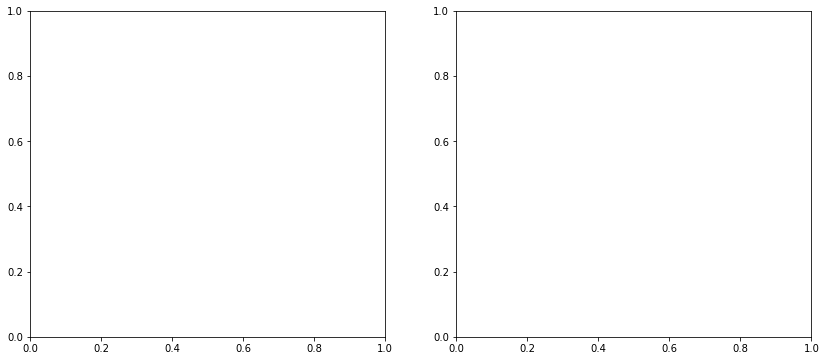

In [108]:
f, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].scatter(dataset.data[:,0], dataset.data[:,1], c=dataset.target)
ax[0].set_title('scatter with Sepal')
ax[1].scatter(dataset.data[:,2], dataset.data[:,3], c=dataset.target)
ax[1].set_title('scatter with Petal')
plt.show()